# Gold Price Prediction using Random Forest

In [54]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

## Collecting the Dataset and Processing


In [7]:
gold_dataset=pd.read_csv('gld_price_data.csv')
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking null values

gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# statistical measure of dataset

gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


 Correlation
 
 1. Positive Correlation
 2. Negative Correlation

In [20]:
gold_dataset=gold_dataset.drop('Date',axis=1)

In [21]:
correlation=gold_dataset.corr()

<Axes: >

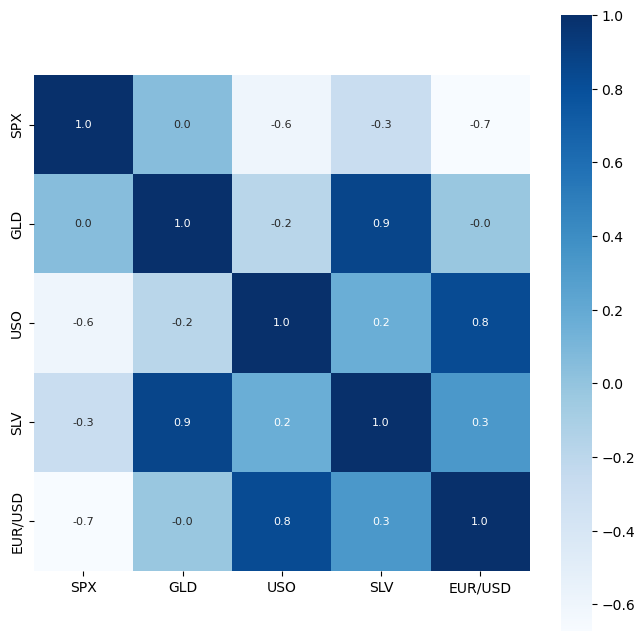

In [22]:
# constructing the heatmap

plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [23]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


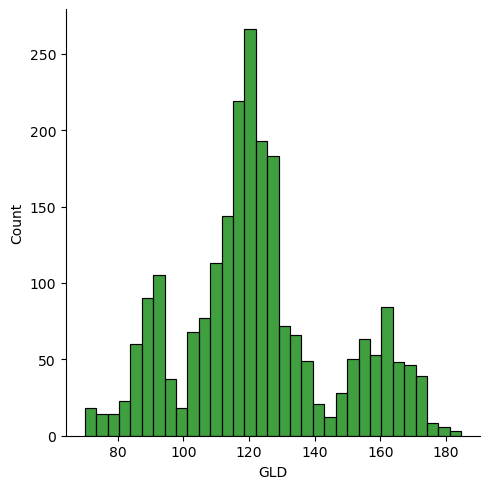

In [24]:
# checking the distribution of gold price

sns.displot(gold_dataset['GLD'],color='Green')

In [25]:
X=gold_dataset.drop('GLD',axis=1)
y=gold_dataset['GLD']

In [26]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [27]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

### Train Test Split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
X_train.shape

(1832, 4)

In [36]:
X_test.shape

(458, 4)

In [38]:
y_train.shape

(1832,)

In [39]:
y_test.shape

(458,)

## Training the Model

In [42]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

### Model Evaluation

In [43]:
# On training data

train_model_pred=model.predict(X_train)
train_model_pred

array([109.90979805, 114.80330078,  90.69910002, ..., 130.53969598,
       159.82039582, 114.98909948])

In [44]:
# R squared error

train_error_score=metrics.r2_score(y_train,train_model_pred)
print("R Squared Error",train_error_score)

R Squared Error 0.9984413563949011


In [45]:
# on Test Data

test_model_pred=model.predict(X_test)
test_error_score=metrics.r2_score(y_test,test_model_pred)
print("R Squared Error",test_error_score)

R Squared Error 0.9894852760360306


### Visualization

#### actual Value Vs Predicted Values

In [46]:
y_test=list(y_test)

In [47]:
y_train=list(y_train)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


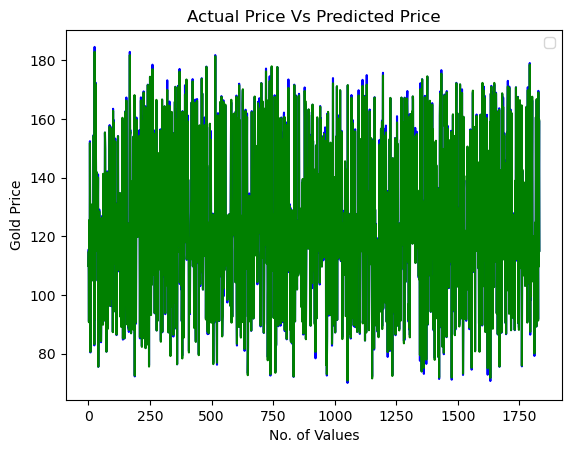

In [52]:
plt.plot(y_train,color='blue')
plt.plot(train_model_pred,color='green')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('No. of Values')
plt.ylabel("Gold Price")
plt.legend()
plt.show()

### Predictive System


In [62]:
input_data=(1325.189941,71.540001,16.030001,1.461796)
input_data_asarray=np.asarray(input_data)
input_data_reshaped=input_data_asarray.reshape(1,-1)
model.predict(input_data_reshaped)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([87.72839837])

### pickle File

In [56]:
pickle.dump(model,open('goldprice.pkl','wb'))

In [58]:
pickled_model=pickle.load(open('goldprice.pkl','rb'))

In [61]:
pickled_model.predict(input_data_reshaped)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([86.27490109])